In [4]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 325.1 kB/s eta 0:00:01
   --------------- ------------------------ 30.7/81.9 kB 325.1 kB/s eta 0:00:01
   -------------------- ------------------- 41.0/81.9 kB 163.4 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 306.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from sklearn.model_selection import train_test_split
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
#Чтение данных
data = pd.read_csv('data.csv')
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,25,18.0,False
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,1,1,6.0,False
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,5,0,0.0,True
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,2,11,9.0,False
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,0,0.0,True


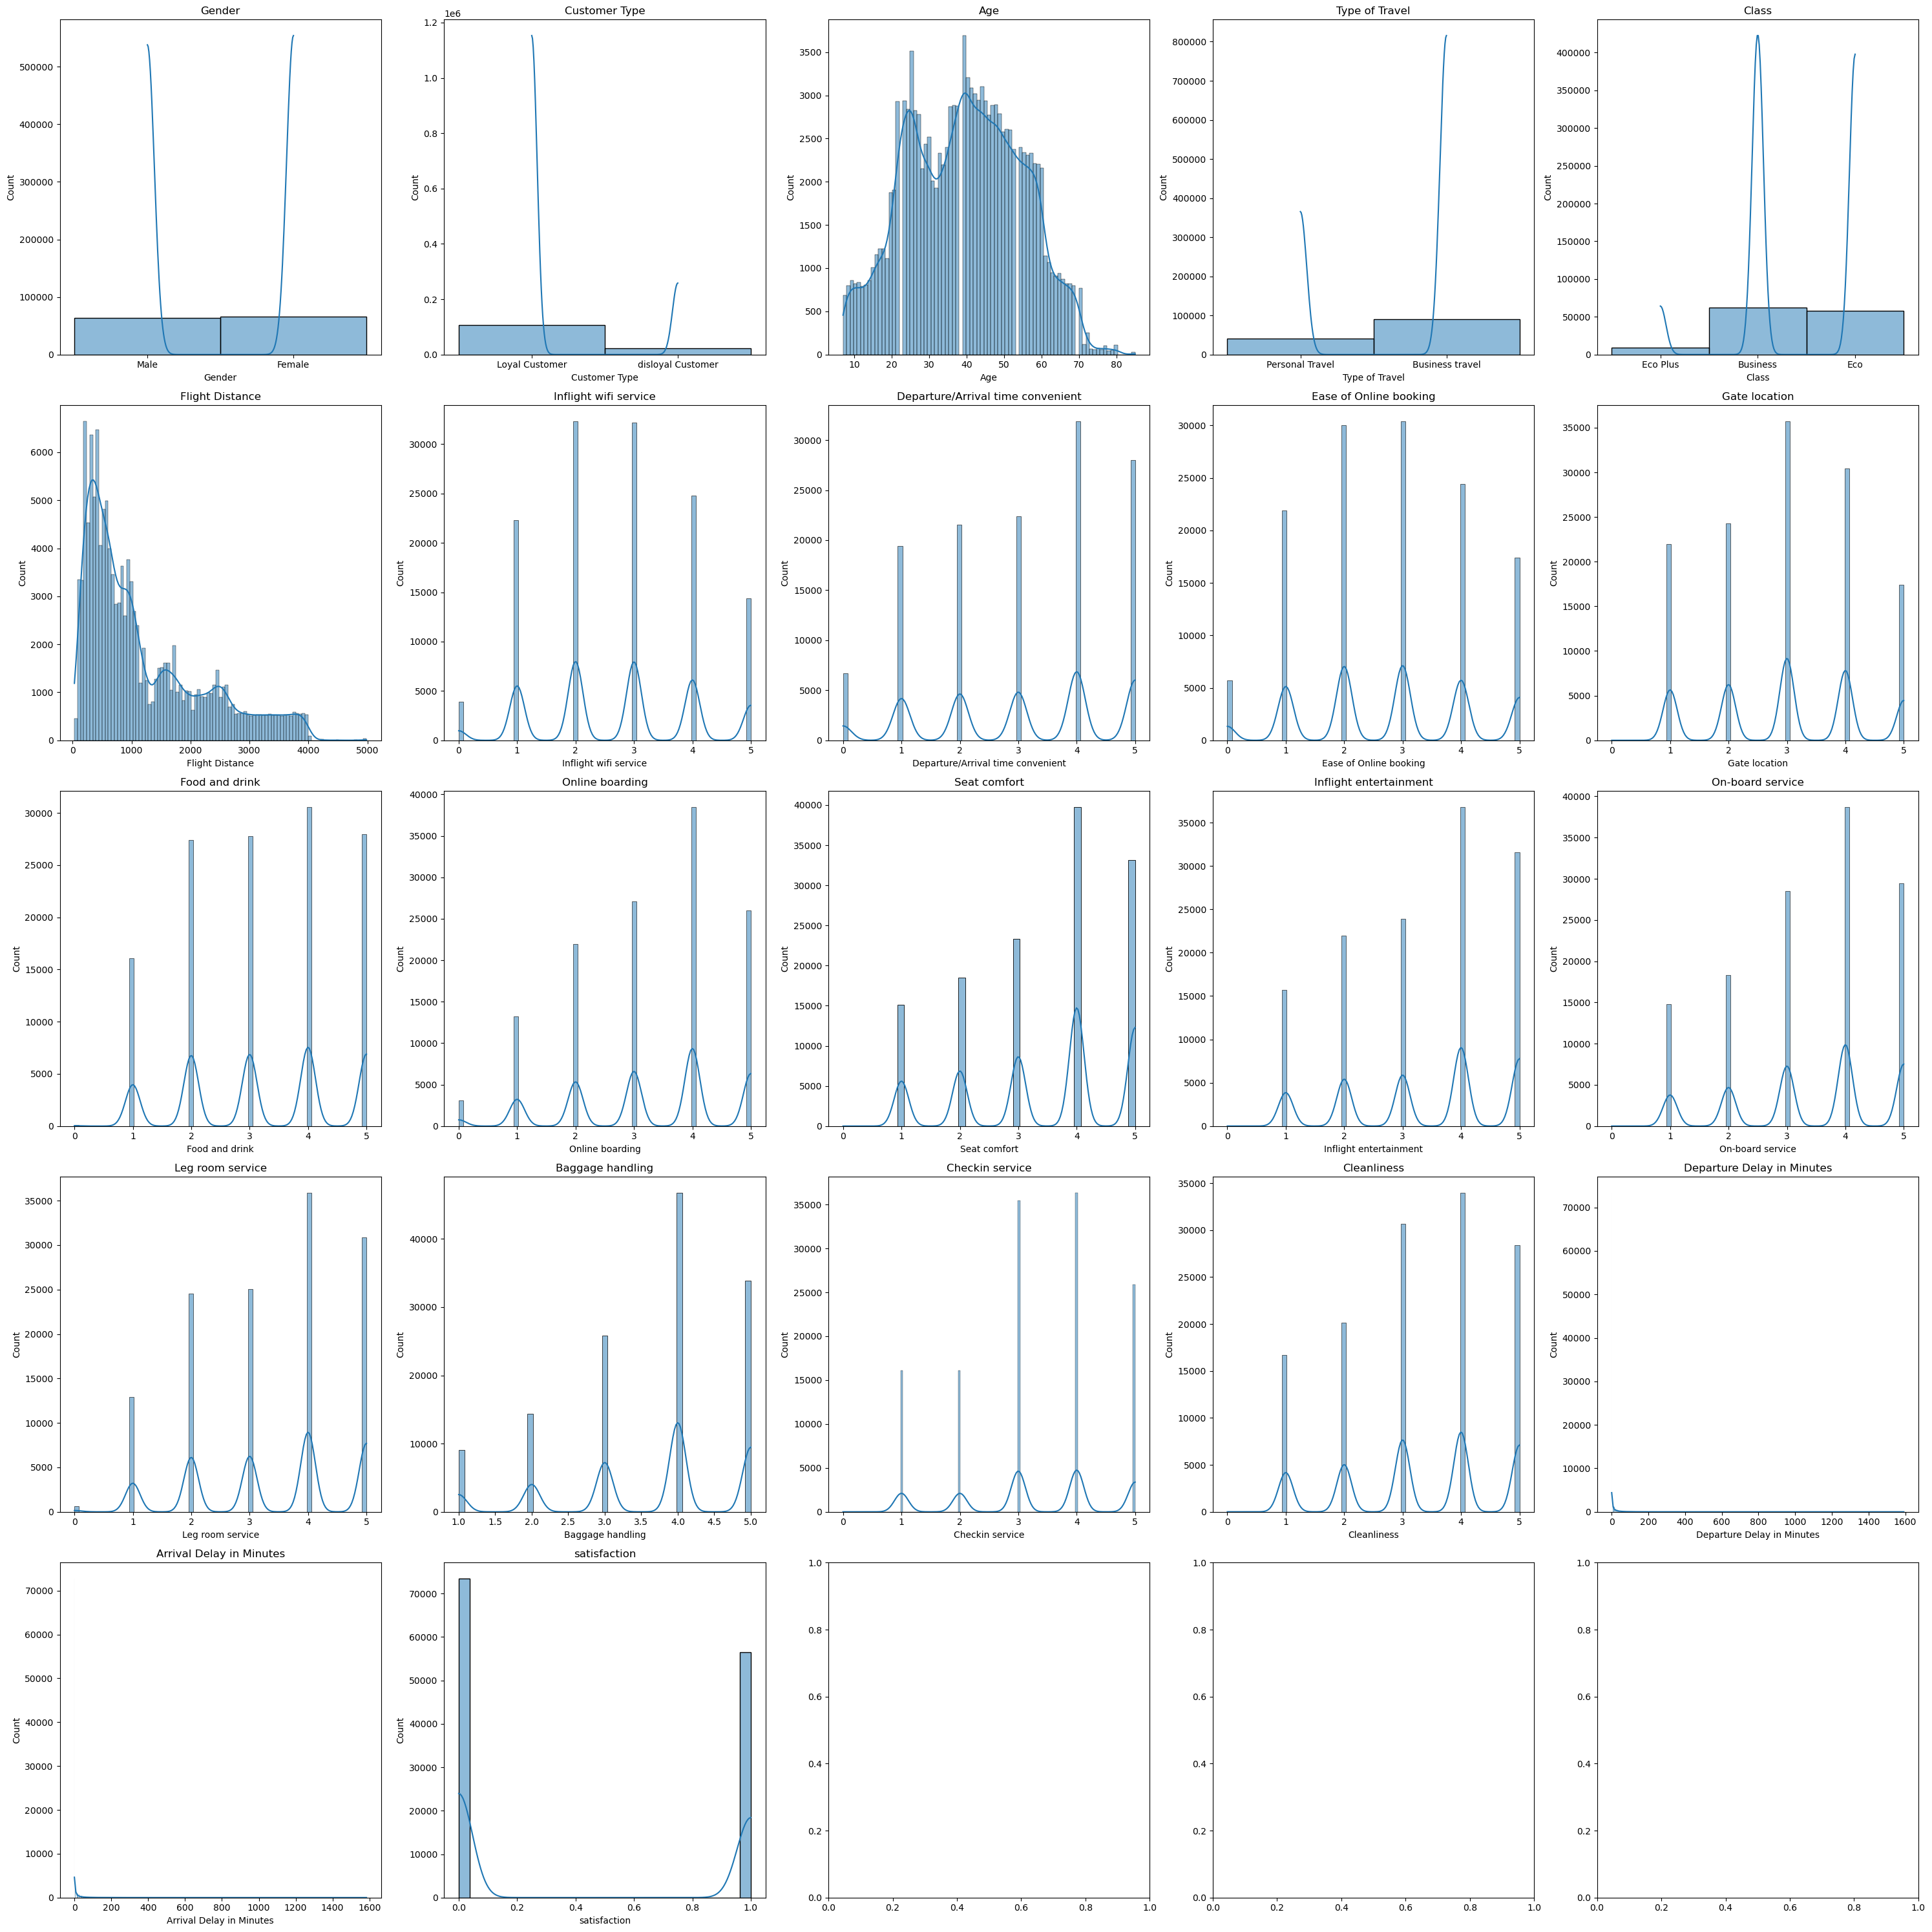

In [22]:
#Проводим визуальный осмотр данный на выбросы
df = data
fig, axes = plt.subplots(5, 5, figsize=(30, 30))

# Цикл для построения графиков
for i, column in enumerate(df.columns):
    sns.histplot(data=df[column], ax=axes[i//5, i%5], kde=True)
    axes[i//5, i%5].set_title(column)

# Настройка отображения
plt.tight_layout()

# Отображение графиков
plt.show()

In [55]:
#Разделение на тестовую и тренировочную выборки
Y = data['satisfaction'].to_numpy()
data = data.drop('satisfaction', axis = 1)

In [39]:
#Проверка на NaN
data.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
dtype: bool

In [56]:
#Пробуем заменить NaN на среднее
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean())

In [41]:
data.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
dtype: bool

In [57]:
encoder = BinaryEncoder(cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class'])
data = encoder.fit_transform(data)

data.head()

,Gender_0,Gender_1,Customer Type_0,Customer Type_1,Age,Type of Travel_0,Type of Travel_1,Class_0,Class_1,Flight Distance,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,0,1,13,0,1,0,1,460,...,3,5,5,4,3,4,4,5,25,18.0
1,0,1,1,0,25,1,0,1,0,235,...,3,1,1,1,5,3,1,1,1,6.0
2,1,0,0,1,26,1,0,1,0,1142,...,5,5,5,4,3,4,4,5,0,0.0
3,1,0,0,1,25,1,0,1,0,562,...,2,2,2,2,5,3,1,2,11,9.0
4,0,1,0,1,61,1,0,1,0,214,...,5,5,3,3,4,4,3,3,0,0.0


In [58]:
#Разделение данных на тестовую и тренировочную выборки

X = data.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [59]:
# Тренируем модель без дополнительного исследования данных
model = LogisticRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)

print(score)

0.8209116107175854
